In [3]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score
from pathlib import Path

# === CONFIGURATION ===
img_size = (224, 224)
batch_size = 32
epochs = 50
num_classes = 5
l2_lambda = 0.01
k_folds = 5

base_dir = Path("splitted_data_kfold")
results = []

# === DATA AUGMENTATION ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# === MODEL BUILDER ===
def build_model():
    model = models.Sequential([
        # Layer 1
        layers.Conv2D(16, (3,3), activation='relu', input_shape=img_size + (3,),
                      kernel_regularizer=regularizers.l2(l2_lambda)),

        # Layer 2
        layers.Conv2D(32, (3,3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.MaxPooling2D((2,2), strides=2),

        # Layer 3
        layers.Conv2D(64, (3,3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(0.5),

        # Layer 4
        layers.Conv2D(128, (3,3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.MaxPooling2D((2,2), strides=2),

        # Layer 5
        layers.Conv2D(256, (3,3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


🔹 Fold 1/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160
Epoch 1/50
25/25 [==============================] - 82s 3s/step - loss: 11.9216 - accuracy: 0.2113 - val_loss: 8.1061 - val_accuracy: 0.1950
Epoch 2/50
25/25 [==============================] - 79s 3s/step - loss: 6.1126 - accuracy: 0.2013 - val_loss: 4.5868 - val_accuracy: 0.2050
Epoch 3/50
25/25 [==============================] - 82s 3s/step - loss: 3.9020 - accuracy: 0.1975 - val_loss: 3.3754 - val_accuracy: 0.1950
Epoch 4/50
25/25 [==============================] - 80s 3s/step - loss: 3.1400 - accuracy: 0.2025 - val_loss: 2.9482 - val_accuracy: 0.2050
Epoch 5/50
25/25 [==============================] - 80s 3s/step - loss: 2.8404 - accuracy: 0.2300 - val_loss: 2.7437 - val_accuracy: 0.

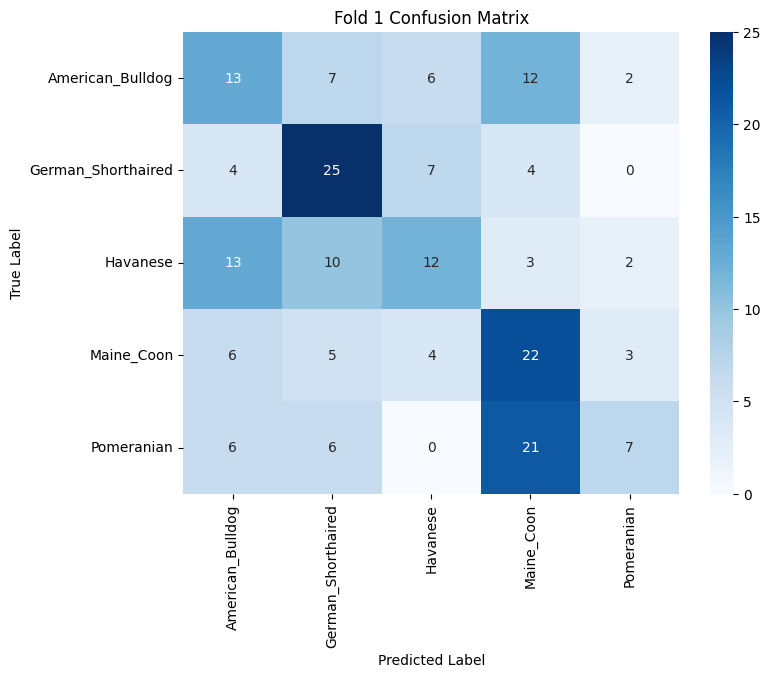

Prediction distribution for Fold 1: {'American_Bulldog': 42, 'German_Shorthaired': 53, 'Havanese': 29, 'Maine_Coon': 62, 'Pomeranian': 14}

🔹 Fold 2/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160
Epoch 1/50
25/25 [==============================] - 83s 3s/step - loss: 9.8847 - accuracy: 0.2037 - val_loss: 6.5455 - val_accuracy: 0.2000
Epoch 2/50
25/25 [==============================] - 80s 3s/step - loss: 4.8268 - accuracy: 0.2000 - val_loss: 3.6568 - val_accuracy: 0.2000
Epoch 3/50
25/25 [==============================] - 81s 3s/step - loss: 3.2347 - accuracy: 0.2000 - val_loss: 2.9263 - val_accuracy: 0.2000
Epoch 4/50
25/25 [==============================] - 80s 3s/step - loss: 2.7789 - accuracy: 0.2000 - val_loss: 2.6527 - val_accuracy: 0.20

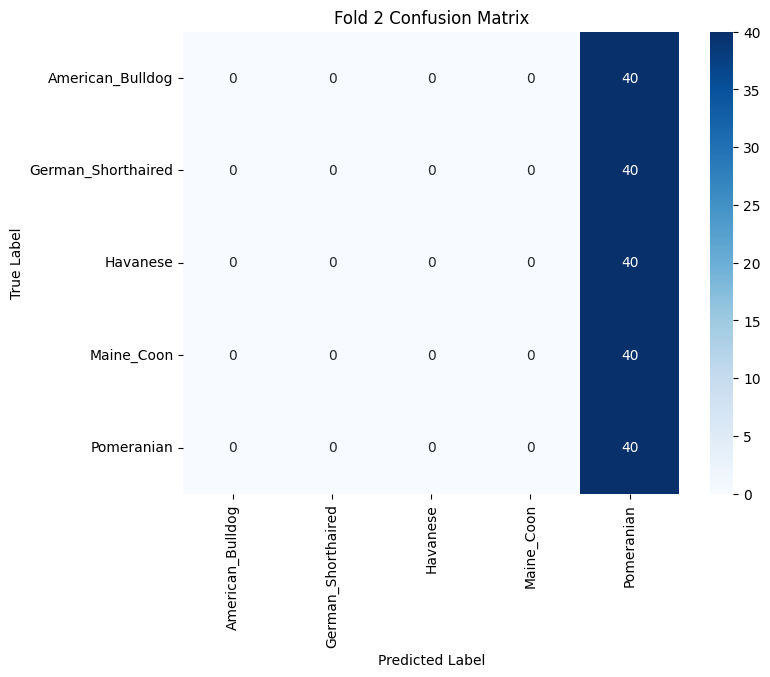

Prediction distribution for Fold 2: {'Pomeranian': 200}

🔹 Fold 3/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160
Epoch 1/50
25/25 [==============================] - 86s 3s/step - loss: 8.3235 - accuracy: 0.1775 - val_loss: 5.3684 - val_accuracy: 0.2000
Epoch 2/50
25/25 [==============================] - 82s 3s/step - loss: 4.0747 - accuracy: 0.2050 - val_loss: 3.2620 - val_accuracy: 0.2050
Epoch 3/50
25/25 [==============================] - 81s 3s/step - loss: 3.0022 - accuracy: 0.2087 - val_loss: 2.7948 - val_accuracy: 0.1650
Epoch 4/50
25/25 [==============================] - 82s 3s/step - loss: 2.6780 - accuracy: 0.1863 - val_loss: 2.5665 - val_accuracy: 0.2000
Epoch 5/50
25/25 [==============================] - 80s 3s/step - loss: 2.4852 -

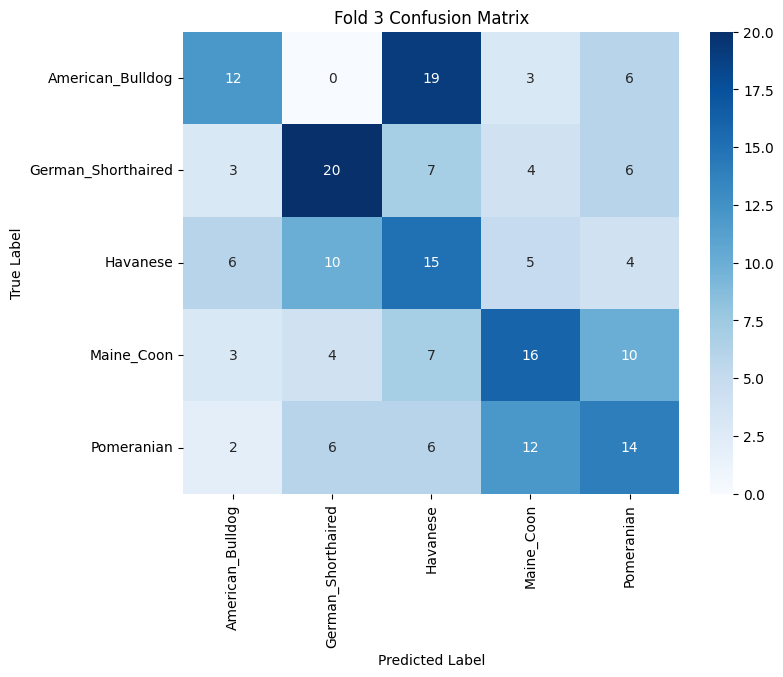

Prediction distribution for Fold 3: {'American_Bulldog': 26, 'German_Shorthaired': 40, 'Havanese': 54, 'Maine_Coon': 40, 'Pomeranian': 40}

🔹 Fold 4/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160
Epoch 1/50
25/25 [==============================] - 87s 3s/step - loss: 16.0671 - accuracy: 0.2087 - val_loss: 9.9640 - val_accuracy: 0.2000
Epoch 2/50
25/25 [==============================] - 82s 3s/step - loss: 7.4918 - accuracy: 0.1912 - val_loss: 5.5823 - val_accuracy: 0.2650
Epoch 3/50
25/25 [==============================] - 81s 3s/step - loss: 4.7270 - accuracy: 0.2450 - val_loss: 4.0668 - val_accuracy: 0.2700
Epoch 4/50
25/25 [==============================] - 81s 3s/step - loss: 3.7847 - accuracy: 0.2575 - val_loss: 3.5364 - val_accuracy: 0.2

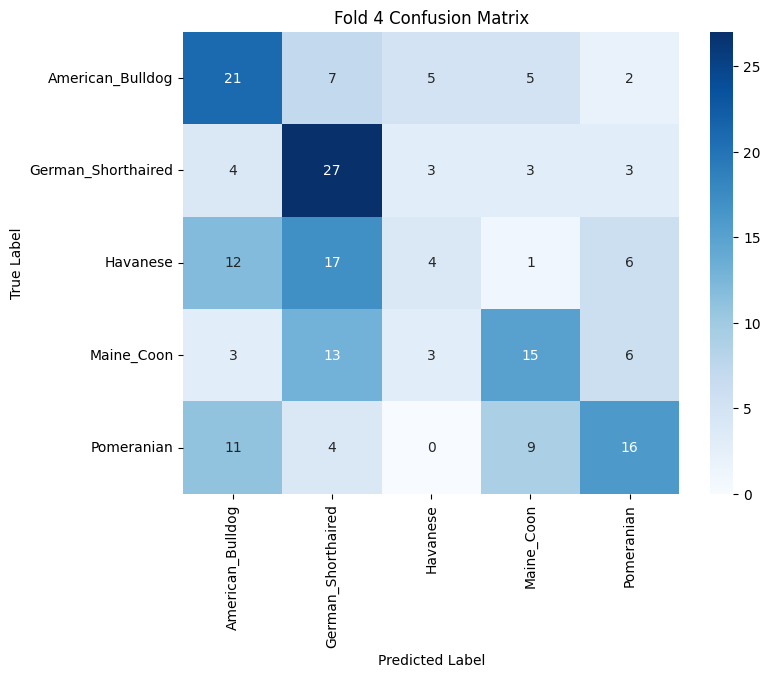

Prediction distribution for Fold 4: {'American_Bulldog': 51, 'German_Shorthaired': 68, 'Havanese': 15, 'Maine_Coon': 33, 'Pomeranian': 33}

🔹 Fold 5/5
Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Class indices: {'American_Bulldog': 0, 'German_Shorthaired': 1, 'Havanese': 2, 'Maine_Coon': 3, 'Pomeranian': 4}
American_Bulldog : 160
German_Shorthaired : 160
Havanese : 160
Maine_Coon : 160
Pomeranian : 160
Epoch 1/50
25/25 [==============================] - 89s 4s/step - loss: 15.0164 - accuracy: 0.2087 - val_loss: 11.0202 - val_accuracy: 0.2350
Epoch 2/50
25/25 [==============================] - 84s 3s/step - loss: 8.7083 - accuracy: 0.2688 - val_loss: 6.7002 - val_accuracy: 0.2950
Epoch 3/50
25/25 [==============================] - 81s 3s/step - loss: 5.5959 - accuracy: 0.3025 - val_loss: 4.7420 - val_accuracy: 0.3200
Epoch 4/50
25/25 [==============================] - 81s 3s/step - loss: 4.1785 - accuracy: 0.3363 - val_loss: 3.7793 - val_accuracy: 0.

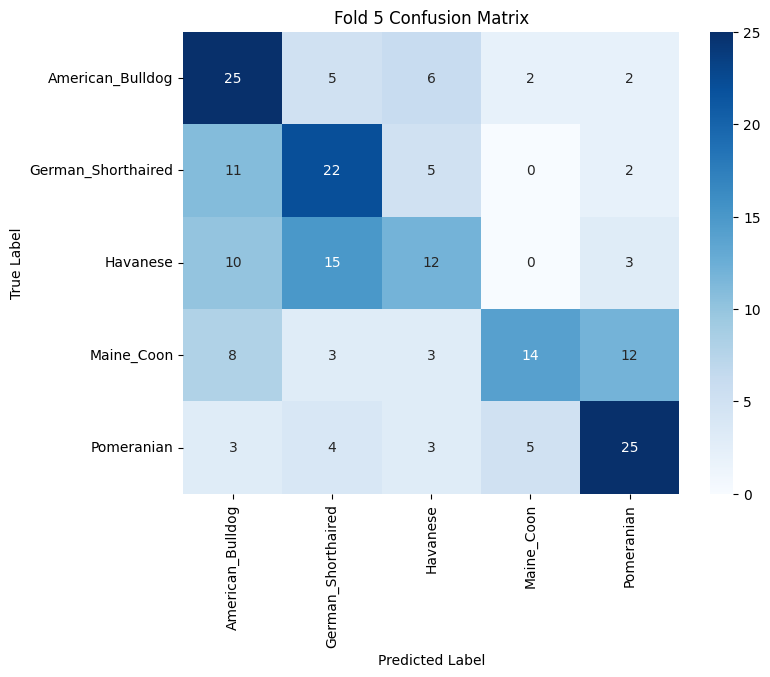

Prediction distribution for Fold 5: {'American_Bulldog': 57, 'German_Shorthaired': 49, 'Havanese': 29, 'Maine_Coon': 21, 'Pomeranian': 44}

📊 5-Fold Cross Validation Summary:
Accuracy : 0.3770 ± 0.0958
F1-Score : 0.3411 ± 0.1423
Loss     : 1.6968

🔸 Training final model on all available training data...
Found 1000 images belonging to 5 classes.
Epoch 1/50
32/32 [==============================] - 110s 3s/step - loss: 7.9540 - accuracy: 0.1860
Epoch 2/50
32/32 [==============================] - 96s 3s/step - loss: 5.6505 - accuracy: 0.2460
Epoch 3/50
32/32 [==============================] - 96s 3s/step - loss: 4.8288 - accuracy: 0.2430
Epoch 4/50
32/32 [==============================] - 96s 3s/step - loss: 4.3157 - accuracy: 0.2850
Epoch 5/50
32/32 [==============================] - 96s 3s/step - loss: 3.9208 - accuracy: 0.3140
Epoch 6/50
32/32 [==============================] - 97s 3s/step - loss: 3.6215 - accuracy: 0.3260
Epoch 7/50
32/32 [==============================] - 96s 3s/step 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === TRAIN & EVALUATE PER FOLD ===
for fold in range(1, k_folds + 1):
    print(f"\n🔹 Fold {fold}/{k_folds}")
    train_dir = base_dir / f"fold_{fold}" / "train"
    val_dir   = base_dir / f"fold_{fold}" / "val"

    # Generators per fold
    train_gen = train_datagen.flow_from_directory(
        train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
    )
    val_gen = val_datagen.flow_from_directory(
        val_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical", shuffle=False
    )

    print("Class indices:", train_gen.class_indices)
    for cls, idx in train_gen.class_indices.items():
        print(cls, ":", sum(train_gen.classes == idx))

    model = build_model()
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ]

    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate
    val_loss, val_acc = model.evaluate(val_gen, verbose=0)
    y_true = val_gen.classes
    y_pred = np.argmax(model.predict(val_gen, verbose=0), axis=1)
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Fold {fold} Results: accuracy={val_acc:.4f}, loss={val_loss:.4f}, f1={f1:.4f}")
    results.append({'fold': fold, 'accuracy': val_acc, 'loss': val_loss, 'f1': f1})

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_gen.class_indices.keys(), yticklabels=train_gen.class_indices.keys())
    plt.title(f'Fold {fold} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # --- Prediction Distribution ---
    unique, counts = np.unique(y_pred, return_counts=True)
    pred_dist = dict(zip([list(train_gen.class_indices.keys())[i] for i in unique], counts))
    print(f"Prediction distribution for Fold {fold}: {pred_dist}")

# === AVERAGE METRICS ===
accs = [r['accuracy'] for r in results]
losses = [r['loss'] for r in results]
f1s = [r['f1'] for r in results]

avg_acc = np.mean(accs)
avg_loss = np.mean(losses)
avg_f1 = np.mean(f1s)
std_acc = np.std(accs)
std_f1 = np.std(f1s)

print("\n📊 5-Fold Cross Validation Summary:")
print(f"Accuracy : {avg_acc:.4f} ± {std_acc:.4f}")
print(f"F1-Score : {avg_f1:.4f} ± {std_f1:.4f}")
print(f"Loss     : {avg_loss:.4f}")

# Save metrics
os.makedirs("checkpoints_exp2", exist_ok=True)
with open("checkpoints_exp2/exp2_kfold_results.json", "w") as f:
    json.dump(results, f, indent=2)

# === FINAL MODEL TRAINING ON FULL DATA ===
print("\n🔸 Training final model on all available training data...")
final_train_dir = Path("splitted_data_kfold/full_train")

final_train_gen = train_datagen.flow_from_directory(
    final_train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True    # important for training
)

# Build model with best configuration found in cross-validation
final_model = build_model()

# Compile with stable parameters
final_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train on full data
history_final = final_model.fit(
    final_train_gen,
    epochs=epochs,
    verbose=1
)

# Save model
final_model.save("checkpoints_exp2/final_model.h5")

# Evaluate on the same data (for reference only)
final_loss, final_acc = final_model.evaluate(final_train_gen, verbose=0)
y_true_full = final_train_gen.classes
y_pred_full = np.argmax(final_model.predict(final_train_gen, verbose=0), axis=1)
final_f1 = f1_score(y_true_full, y_pred_full, average='macro')

print("\n📘 Final Model (Full Training Data) Results:")
print(f"Accuracy: {final_acc:.4f}")
print(f"Loss:     {final_loss:.4f}")
print(f"F1-Score: {final_f1:.4f}")


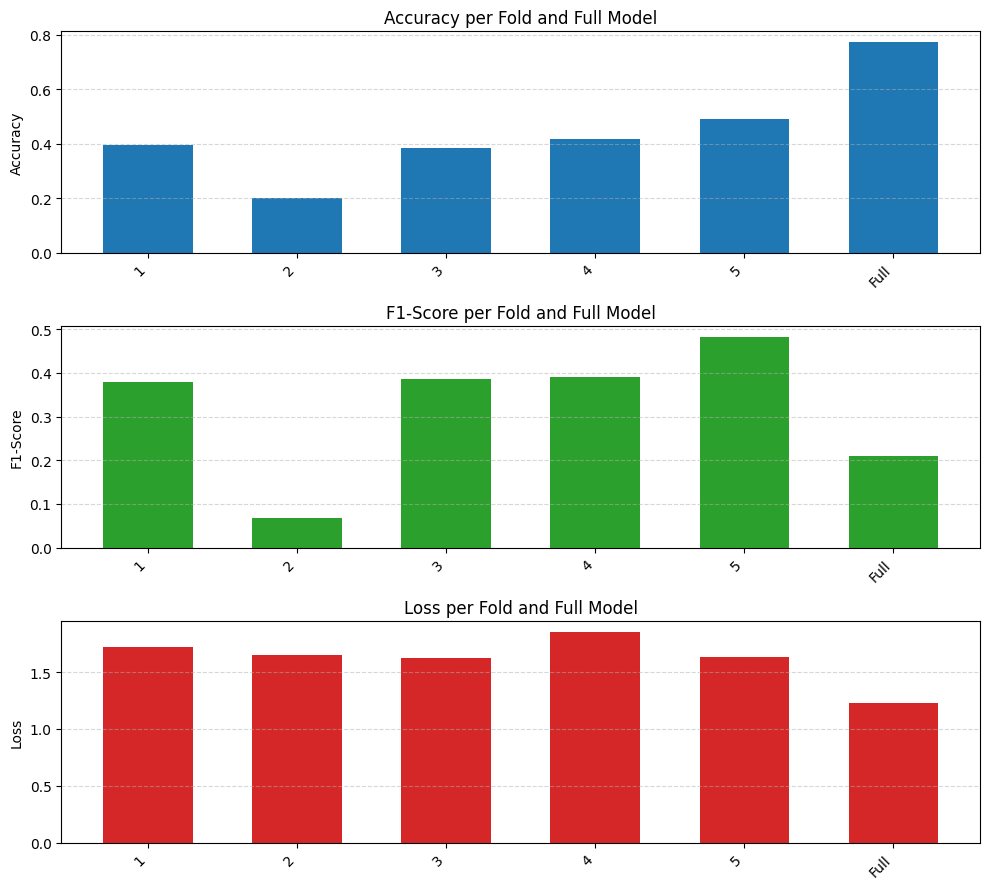

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare labels with duplicate handling ---
fold_labels = []
seen = {}
for r in results:
    f = r['fold']
    if f in seen:
        seen[f] += 1
        fold_labels.append(f"Improved {f}")
    else:
        seen[f] = 1
        fold_labels.append(str(f))

# Add final model
fold_labels.append("Full")

# --- Extract metrics ---
accs = [r['accuracy'] for r in results] + [final_acc]
f1s = [r['f1'] for r in results] + [final_f1]
losses = [r['loss'] for r in results] + [final_loss]

x = np.arange(len(fold_labels))

# --- Plot setup ---
fig, axes = plt.subplots(3, 1, figsize=(10, 9))
width = 0.6

# Accuracy
axes[0].bar(x, accs, width, color='tab:blue')
axes[0].set_title("Accuracy per Fold and Full Model")
axes[0].set_ylabel("Accuracy")
axes[0].set_xticks(x)
axes[0].set_xticklabels(fold_labels, rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# F1-Score
axes[1].bar(x, f1s, width, color='tab:green')
axes[1].set_title("F1-Score per Fold and Full Model")
axes[1].set_ylabel("F1-Score")
axes[1].set_xticks(x)
axes[1].set_xticklabels(fold_labels, rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Loss
axes[2].bar(x, losses, width, color='tab:red')
axes[2].set_title("Loss per Fold and Full Model")
axes[2].set_ylabel("Loss")
axes[2].set_xticks(x)
axes[2].set_xticklabels(fold_labels, rotation=45, ha='right')
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


